# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [153]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [154]:

# Combine the data into a single dataset

mouse_study_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])
mouse_study_data.head()

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [155]:
# Checking the number of mice.
mice_count = len(mouse_study_data["Mouse ID"].unique())
mice_count

249

In [156]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = mouse_study_data.loc[mouse_study_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

duplicate_mice

array(['g989'], dtype=object)

In [157]:
# Optional: Get all the data for the duplicate mouse ID. 


dup_mice_df = mouse_study_data.loc[mouse_study_data["Mouse ID"] == "g989",:]
dup_mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [158]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_data_clean = mouse_study_data.drop(mouse_study_data[mouse_study_data['Mouse ID'] == "g989"].index, inplace = False)

mice_data_clean.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [159]:
# Checking the number of mice in the clean DataFrame.
mouse_count = len(mice_data_clean["Mouse ID"].unique())
mouse_count

248

## Summary Statistics

In [160]:
mice_tumor_data = mice_data_clean[["Tumor Volume (mm3)", "Drug Regimen"]]

mice_tumor_data


,Tumor Volume (mm3),Drug Regimen
0,45.000000,Ramicane
1,38.825898,Ramicane
2,35.014271,Ramicane
3,34.223992,Ramicane
4,32.997729,Ramicane
...,...,...
1888,63.145652,Naftisol
1889,65.841013,Naftisol
1890,69.176246,Naftisol
1891,70.314904,Naftisol


In [161]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.





mice_mean = mice_tumor_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]

mice_median = mice_tumor_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]

mice_variance = mice_tumor_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]

mice_SD = mice_tumor_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
 
mice_SEM = mice_tumor_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"] 

mice_tumor_df = pd.DataFrame({"Mean Tumor Volume": mice_mean, 
                                    "Median Tumor Volume":mice_median, 
                                    "Variance Tumor Volume" : mice_variance,
                                   "Tumor STD" : mice_SD,
                                   "Tumor SEM" : mice_SEM,})

mice_tumor_df



,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Tumor STD,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [162]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

mice_tumor_df_single= mice_tumor_data.groupby("Drug Regimen").agg(["mean", "median", "var", "std","sem"])

mice_tumor_df_single


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

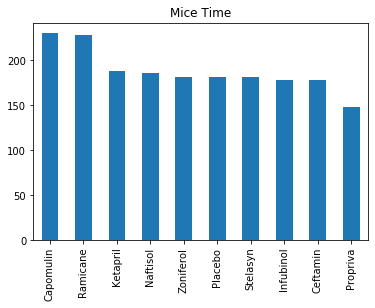

In [163]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mice_time = mice_data_clean['Drug Regimen'].value_counts()
mice_time.plot(kind="bar")


plt.title("Mice Time")

plt.show()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

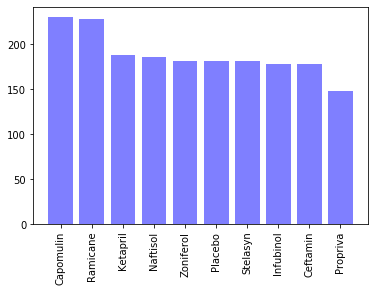

In [164]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.


mice_time_py = mice_data_clean['Drug Regimen'].value_counts()
plt.bar(mice_time.index,mice_time.values,color='b', alpha=0.5, align="center")
plt.xticks(rotation="vertical")


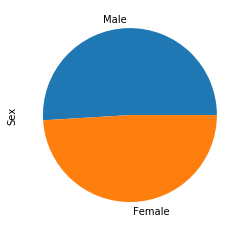

In [165]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mice_time = mice_data_clean['Sex'].value_counts()
mice_time.plot(kind="pie")



plt.show()


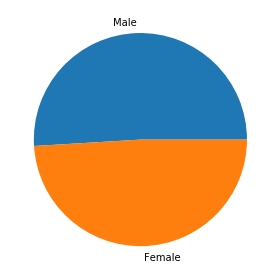

In [166]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#mice_time_py = mice_data_clean['Sex'].value_counts()
#plt.pie(mice_time.index,mice_time.values,)

labels = ["Male", "Female"]

plt.pie((mice_data_clean['Sex'].value_counts()), labels=labels)

plt.tight_layout()



#sex = ["male", "female"]

#fig = plt.figure(figsize =(10, 7))
#plt.pie(mice_data_clean['Sex'].value_counts(), labels = sex)

#plt.show()


## Quartiles, Outliers and Boxplots

In [167]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
max_tumor_mice=mice_data_clean.groupby("Mouse ID")["Tumor Volume (mm3)"].max()


# Start by getting the last (greatest) timepoint for each mouse
mice_timepoint=mice_data_clean.groupby("Mouse ID")["Timepoint"].max()



# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mice_data_clean= pd.merge(mice_timepoint, mice_data_clean, on=(["Mouse ID", "Timepoint"]))

mice_data_clean.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [168]:
# Put treatments into a list for for loop (and later for plot labels)
Drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_final_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 


    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for tumor in Drug_list:
    tumor_vol = mice_data_clean.loc[mice_data_clean["Drug Regimen"] ==tumor, "Tumor Volume (mm3)"]
    
    
    # add subset 
    tumor_final_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    
    quartiles = mice_data_clean["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    tumor_outliers = mice_data_clean.loc[(mice_data_clean["Tumor Volume (mm3)"] < lower_bound) | (mice_data_clean["Tumor Volume (mm3)"] > upper_bound)]
    

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc9887fc4e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc9887fcbe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc9887fc390>,
 'medians': [<matplotlib.lines.Line2D at 0x7fc98880c470>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc98880c8d0>,
 'means': []}

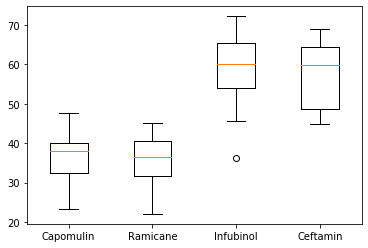

In [169]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_final_data, labels = Drug_list)



# Line and Scatter Plots

<function matplotlib.pyplot.show(*args, **kw)>

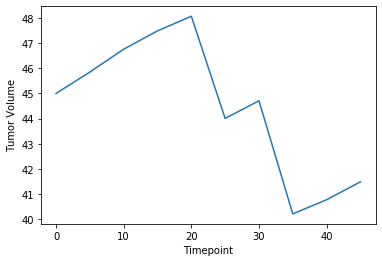

In [170]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_df = mouse_study_data.loc[mouse_study_data["Drug Regimen"] == "Capomulin"]
#Capomulin_df.head()

Mouse_l509 = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509"]

plt.plot(Mouse_l509["Timepoint"], Mouse_l509["Tumor Volume (mm3)"])

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")


plt.show

#lines = Capomulin_df.plot.line(x='Timepoint', y='Tumor Volume (mm3)')


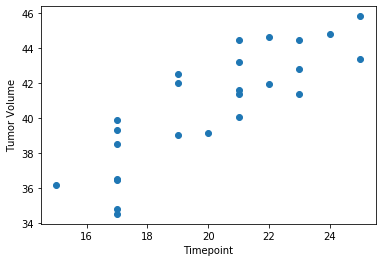

In [176]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

volume_average = Capomulin_df.groupby(["Mouse ID"]).mean()

plt.scatter(volume_average["Weight (g)"], volume_average["Tumor Volume (mm3)"])

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")

plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


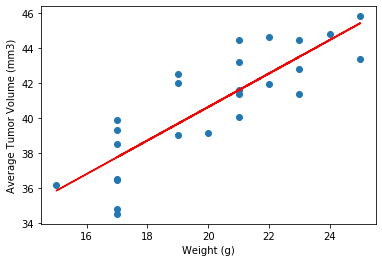

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

